In [14]:
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv("data_studentlist.csv")
df.head()

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [15]:
print(df["height"].mean())
print(df["height"].var(ddof=0))
print(df["height"].std(ddof=0))
print(df["height"].min())
print(df["height"].max())
print(df["height"].quantile(0.25))
print(df["height"].quantile(0.5))

170.03529411764703
57.99404844290661
7.61538235697372
155.2
182.1
165.3
169.2


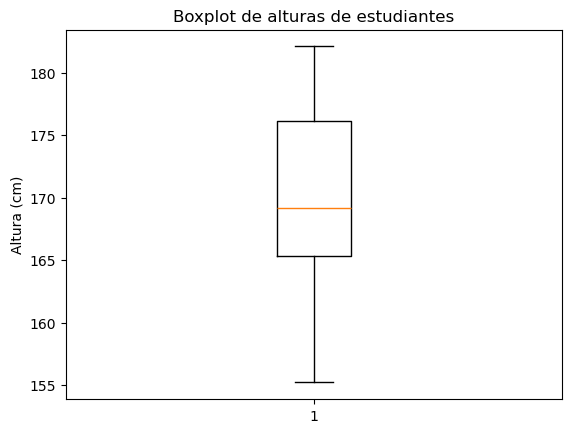

In [16]:
#graficaremos boxplot 
plt.boxplot(df["height"])
plt.title("Boxplot de alturas de estudiantes")  
plt.ylabel("Altura (cm)")
plt.show()

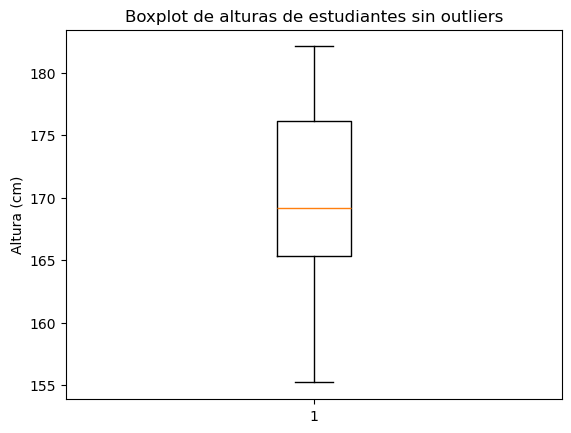

In [17]:
#sin outliers
q1 = df["height"].quantile(0.25)
q3 = df["height"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_no_outliers = df[(df["height"] >= lower_bound) & (df["height"] <= upper_bound)]  
plt.boxplot(df_no_outliers["height"])
plt.title("Boxplot de alturas de estudiantes sin outliers")
plt.ylabel("Altura (cm)")
plt.show()

In [18]:
df["height"].corr(df["weight"], method='spearman')

np.float64(0.6094421746357142)

In [23]:
#matris de corelacion de age height weight y  corr
correlaciones = df[["age", "height", "weight"]].corr()
print(correlaciones)

             age    height    weight
age     1.000000  0.345099  0.522685
height  0.345099  1.000000  0.664182
weight  0.522685  0.664182  1.000000


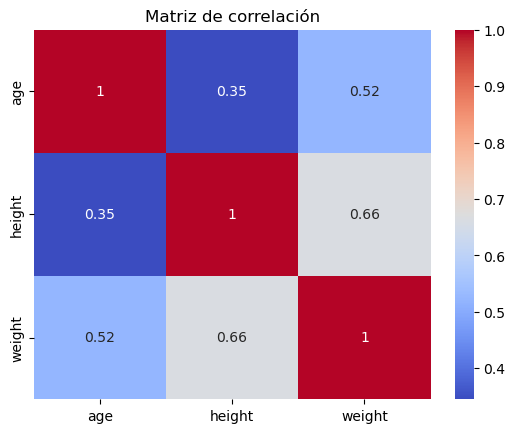

In [25]:
import seaborn as sns 
sns.heatmap(correlaciones, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

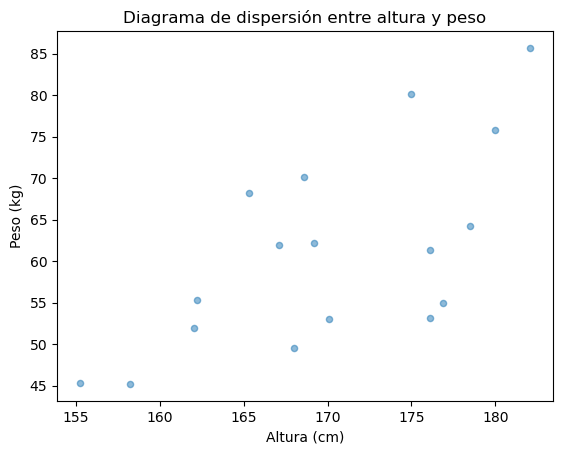

In [29]:
df.plot.scatter( x="height", y="weight", alpha=0.5)
plt.title("Diagrama de dispersión entre altura y peso")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.show()

In [31]:
#stat flow  si son hombres o mujeres
hombres = df[df["gender"] == "M"].shape[0]
mujeres = df[df["gender"] == "F"].shape[0]
total = df.shape[0]
print(f"Hombres: {hombres} ({(hombres/total)*100:.2f}%)")
print(f"Mujeres: {mujeres} ({(mujeres/total)*100:.2f}%)")

Hombres: 10 (58.82%)
Mujeres: 7 (41.18%)


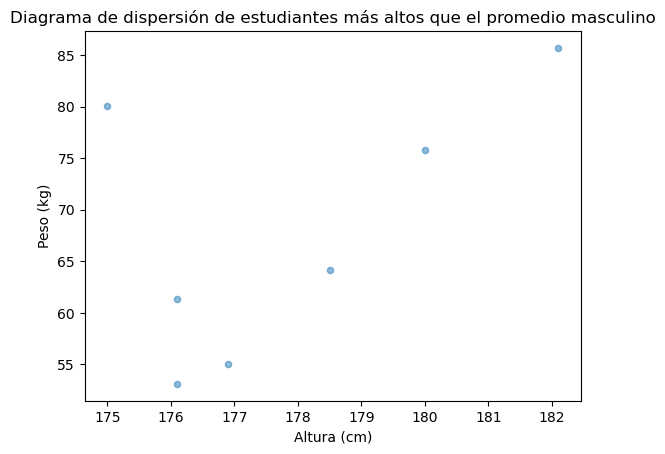

In [ ]:

df[df["height"] > df[df["gender"]=="M"]["height"].mean()].plot.scatter( x="height", y="weight", alpha=0.5)


In [ ]:
#lacnzamos una moneda 10 veces los resultados son:

medias = pd.Series({0.6, 0.65, 0.7, 0.75, 0.8, 0.6, 0.5, 0.4, 0.3})
medias.plot()
